In [165]:
from bitmex import bitmex
import json
from datetime import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [167]:
keys = open('keys.txt')
# api_key=keys.readline()[:-2]
# api_secret=keys.readline()[:-2]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/martyn/anaconda3/envs/DataScience/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-167-6b112bf84d8d>", line 1, in <module>
    keys = open('keys.txt')
FileNotFoundError: [Errno 2] No such file or directory: 'keys.txt'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/martyn/anaconda3/envs/DataScience/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'FileNotFoundError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/martyn/anaconda3/envs/DataScience/lib/python3.7/site-packages/IPython/core/ultratb.py", line 1148, in get_records
    return _fixed_getinn

FileNotFoundError: [Errno 2] No such file or directory: 'keys.txt'

In [154]:

client = bitmex(test=True, api_key=api_key, api_secret=api_secret)

In [44]:
dir(client)

['APIKey',
 'Announcement',
 'Chat',
 'Execution',
 'Funding',
 'GlobalNotification',
 'Instrument',
 'Insurance',
 'Leaderboard',
 'Liquidation',
 'Order',
 'OrderBook',
 'Position',
 'Schema',
 'Settlement',
 'Stats',
 'Trade',
 'User',
 'UserEvent']

In [64]:
dir(client.OrderBook
   )

['OrderBook_getL2']

[{'symbol': 'XBTUSD',
  'id': 15599051300,
  'side': 'Sell',
  'size': 65,
  'price': 9487.0},
 {'symbol': 'XBTUSD',
  'id': 15599051400,
  'side': 'Sell',
  'size': 33,
  'price': 9486.0},
 {'symbol': 'XBTUSD',
  'id': 15599051450,
  'side': 'Sell',
  'size': 102,
  'price': 9485.5},
 {'symbol': 'XBTUSD',
  'id': 15599051500,
  'side': 'Sell',
  'size': 33,
  'price': 9485.0},
 {'symbol': 'XBTUSD',
  'id': 15599051550,
  'side': 'Sell',
  'size': 24,
  'price': 9484.5},
 {'symbol': 'XBTUSD',
  'id': 15599051600,
  'side': 'Sell',
  'size': 208,
  'price': 9484.0},
 {'symbol': 'XBTUSD',
  'id': 15599051650,
  'side': 'Sell',
  'size': 24,
  'price': 9483.5},
 {'symbol': 'XBTUSD',
  'id': 15599051700,
  'side': 'Sell',
  'size': 33,
  'price': 9483.0},
 {'symbol': 'XBTUSD',
  'id': 15599051800,
  'side': 'Sell',
  'size': 108,
  'price': 9482.0},
 {'symbol': 'XBTUSD',
  'id': 15599051850,
  'side': 'Sell',
  'size': 75,
  'price': 9481.5},
 {'symbol': 'XBTUSD',
  'id': 15599051900,
  's

In [128]:
df_XBT_orderbook = pd.DataFrame(client.OrderBook.OrderBook_getL2(symbol='XBTUSD').result()[0])
def refresh_orderbook():
    global df_XBT_orderbook
    df_XBT_orderbook = pd.DataFrame(client.OrderBook.OrderBook_getL2(symbol='XBTUSD').result()[0])
    df_XBT_orderbook['cumul_size'] = df_XBT_orderbook.loc[df_XBT_orderbook['side']=='Sell'].sort_values('price')['size'].cumsum()
    df_XBT_orderbook.loc[df_XBT_orderbook['side']=='Buy','cumul_size'] = df_XBT_orderbook.loc[df_XBT_orderbook['side']=='Buy']['size'].cumsum()


In [60]:
df_Announcments = pd.DataFrame(client.Announcement.Announcement_get().result()[0]).drop('content', axis = 1).iloc[:,[2,3,1,0]]
df_Announcments

,title,date,link,id
0,New ETHUSD Futures Went Live Today (5 May 2020...,2020-05-05 04:41:59+00:00,https://blog.bitmex.com/site_announcement/new-...,20244
1,Reduction in Base Maintenance Margin – XBT and...,2020-05-05 04:15:21+00:00,https://blog.bitmex.com/site_announcement/redu...,20113
2,Reduction in Base Maintenance Margin – XBT and...,2020-05-01 02:30:31+00:00,https://blog.bitmex.com/site_announcement/redu...,20107
3,WebSocket Systems Upgrade Complete: Significan...,2020-04-22 09:39:56+00:00,https://blog.bitmex.com/site_announcement/webs...,19858
4,Reduction in Base Maintenance Margin – XBT and...,2020-04-17 01:19:08+00:00,https://blog.bitmex.com/site_announcement/redu...,19750


In [63]:
df_Instruments = pd.DataFrame(client.Instrument.Instrument_getActive().result()[0])
df_Instruments

,symbol,rootSymbol,state,typ,listing,front,expiry,settle,relistInterval,inverseLeg,...,fairBasisRate,fairBasis,fairPrice,markMethod,markPrice,indicativeTaxRate,indicativeSettlePrice,optionUnderlyingPrice,settledPrice,timestamp
0,XRPM20,XRP,Open,FFCCSX,2020-03-11 08:00:00+00:00,2020-05-29 12:00:00+00:00,2020-06-26 12:00:00+00:00,2020-06-26 12:00:00+00:00,None,,...,0.2000,4.900000e-07,2.159000e-05,FairPrice,2.159000e-05,NaN,2.110000e-05,None,None,2020-05-15 12:48:06.047000+00:00
1,BCHM20,BCH,Open,FFCCSX,2020-03-11 08:00:00+00:00,2020-05-29 12:00:00+00:00,2020-06-26 12:00:00+00:00,2020-06-26 12:00:00+00:00,None,,...,0.2100,6.000000e-04,2.561000e-02,FairPrice,2.561000e-02,NaN,2.501000e-02,None,None,2020-05-15 12:47:55+00:00
2,ADAM20,ADA,Open,FFCCSX,2020-03-11 08:00:00+00:00,2020-05-29 12:00:00+00:00,2020-06-26 12:00:00+00:00,2020-06-26 12:00:00+00:00,None,,...,0.1900,1.200000e-07,5.440000e-06,FairPrice,5.440000e-06,NaN,5.320000e-06,None,None,2020-05-15 12:48:00+00:00
3,EOSM20,EOS,Open,FFCCSX,2020-03-11 08:00:00+00:00,2020-05-29 12:00:00+00:00,2020-06-26 12:00:00+00:00,2020-06-26 12:00:00+00:00,None,,...,0.2000,6.300000e-06,2.820000e-04,FairPrice,2.820000e-04,NaN,2.757000e-04,None,None,2020-05-15 12:48:00+00:00
4,TRXM20,TRX,Open,FFCCSX,2020-03-11 08:00:00+00:00,2020-05-29 12:00:00+00:00,2020-06-26 12:00:00+00:00,2020-06-26 12:00:00+00:00,None,,...,0.2200,4.000000e-08,1.620000e-06,FairPrice,1.620000e-06,NaN,1.580000e-06,None,None,2020-05-15 12:48:00+00:00
5,XBTKRW,XBK,Open,FFWCSX,2017-12-05 12:00:00+00:00,2017-12-05 12:00:00+00:00,NaT,NaT,None,,...,0.1095,1.036000e+03,1.151504e+07,FairPrice,1.151504e+07,0.0,1.151400e+07,None,None,2020-05-15 12:48:05+00:00
6,XRPUSD,XRP,Open,FFWCSX,2020-01-23 12:00:00+00:00,2020-01-23 12:00:00+00:00,NaT,NaT,None,,...,0.1095,0.000000e+00,2.017000e-01,FairPrice,2.017000e-01,NaN,2.017000e-01,None,None,2020-05-15 12:48:05+00:00
7,XBTUSD,XBT,Open,FFWCSX,2016-05-04 12:00:00+00:00,2016-05-04 12:00:00+00:00,NaT,NaT,None,,...,-4.9275,-3.870000e+01,9.517380e+03,FairPrice,9.517380e+03,0.0,9.556080e+03,None,None,2020-05-15 12:48:05+00:00
8,XBTM20,XBT,Open,FFCCSX,2019-12-06 04:00:00+00:00,2020-04-24 12:00:00+00:00,2020-06-26 12:00:00+00:00,2020-06-26 12:00:00+00:00,None,,...,-0.3000,-3.296200e+02,9.226460e+03,FairPrice,9.226460e+03,NaN,9.556080e+03,None,None,2020-05-15 12:48:05+00:00
9,XBTU20,XBT,Open,FFCCSX,2020-03-11 08:00:00+00:00,2020-07-31 12:00:00+00:00,2020-09-25 12:00:00+00:00,2020-09-25 12:00:00+00:00,None,,...,0.2000,6.962400e+02,1.025232e+04,FairPrice,1.025232e+04,NaN,9.556080e+03,None,None,2020-05-15 12:48:05+00:00


In [78]:
# df_XBT_orderbook.loc[:,['size', 'price']]

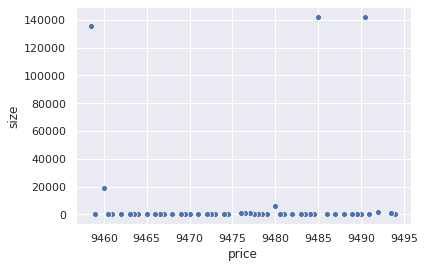

In [121]:
sns.scatterplot(x='price', y='size', data=df_XBT_orderbook)

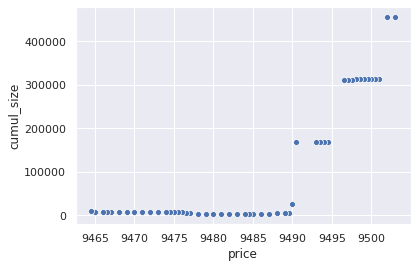

In [139]:
refresh_orderbook()
sns.scatterplot(x='price', y='cumul_size', data=df_XBT_orderbook);

In [106]:
df_XBT_orderbook

,symbol,id,side,size,price,cumul_size
0,XBTUSD,15599051200,Sell,273,9488.0,NaN
1,XBTUSD,15599051300,Sell,65,9487.0,NaN
2,XBTUSD,15599051350,Sell,21,9486.5,NaN
3,XBTUSD,15599051400,Sell,33,9486.0,NaN
4,XBTUSD,15599051450,Sell,102,9485.5,NaN
5,XBTUSD,15599051500,Sell,33,9485.0,NaN
6,XBTUSD,15599051550,Sell,24,9484.5,NaN
7,XBTUSD,15599051600,Sell,208,9484.0,NaN
8,XBTUSD,15599051650,Sell,24,9483.5,NaN
9,XBTUSD,15599051700,Sell,33,9483.0,NaN
